# Gambaran Kondisi Terkait Data

Dataset yang digunakan dalam proyek ini adalah data mobil bekas di Arab Saudi, yang mencakup berbagai fitur yang relevan untuk memprediksi harga mobil. Dataset ini terdiri dari sejumlah kolom yang memberikan informasi penting tentang setiap mobil, termasuk:

- **Price**: Harga mobil yang menjadi target prediksi. Ini adalah variabel kontinu yang menunjukkan nilai jual mobil.
- **Year**: Tahun pembuatan mobil, yang berpengaruh pada usia mobil. Mobil yang lebih baru biasanya memiliki harga yang lebih tinggi.
- **Mileage**: Jarak tempuh mobil dalam kilometer. Mileage yang lebih rendah sering kali menunjukkan kondisi mobil yang lebih baik, sehingga dapat mempengaruhi harga.
- **Engine_Size**: Ukuran mesin mobil dalam liter. Ukuran mesin dapat mempengaruhi performa dan efisiensi bahan bakar, serta daya tarik bagi pembeli.
- **Region**: Wilayah tempat mobil dijual. Permintaan dan harga mobil dapat bervariasi berdasarkan lokasi geografis.
- **Make**: Merek mobil, yang sering kali menjadi faktor penting dalam penentuan harga. Merek yang lebih terkenal atau premium biasanya memiliki harga yang lebih tinggi.
- **Gear_Type**: Tipe transmisi mobil (manual atau otomatis). Tipe transmisi dapat mempengaruhi preferensi pembeli dan harga jual.
- **Options**: Fitur tambahan yang dimiliki mobil, seperti sunroof, sistem navigasi, dan fitur keselamatan. Fitur tambahan ini dapat meningkatkan nilai jual mobil.
- **Negotiable**: Menunjukkan apakah harga dapat dinegosiasikan atau tidak. Mobil dengan harga yang dapat dinegosiasikan mungkin memiliki fleksibilitas dalam penetapan harga.

### Pembersihan Data
Proses pembersihan data telah dilakukan untuk memastikan kualitas data yang digunakan dalam analisis. Langkah-langkah yang diambil meliputi:
- Menghapus duplikat untuk menghindari bias dalam analisis.
- Menghapus nilai yang hilang dan mengisi harga yang hilang untuk mobil yang dapat dinegosiasikan dengan menggunakan median harga dari mobil serupa.
- Menambahkan fitur baru seperti log harga dan usia mobil untuk meningkatkan analisis.

### Feature Engineering
Fitur-fitur kategorikal telah dikategorikan untuk analisis lebih lanjut, termasuk:
- **Mileage_Category**: Kategori mileage (Rendah, Sedang, Tinggi) berdasarkan jarak tempuh.
- **Engine_Size_Category**: Kategori ukuran mesin (Kecil, Sedang, Besar) berdasarkan kapasitas mesin.
- **Car_Age_Category**: Kategori usia mobil (Baru, Sedang, Tua) berdasarkan tahun pembuatan.

### Analisis Data

# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from catboost import CatBoostRegressor

# 2. Import Data

In [2]:
# Load dataset
data = pd.read_excel('data_saudi_used_cars.xlsx')
print("Dataset loaded successfully.")
print(f"Dataset shape: {data.shape}")
print(data.info())


Dataset loaded successfully.
Dataset shape: (5624, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB
None


# 3.Hapus Duplicate

In [3]:
# Check for duplicate entries in the dataset
duplicates = data.duplicated().sum()
duplicates


4

In [4]:
# Drop duplicate data
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
print(f"Data after cleaning: {data.shape}")


Data after cleaning: (5620, 11)


### Deteksi Duplikat
- **Jumlah Duplikat**: Terdapat 4 entri duplikat dalam dataset.
- **Tindakan yang Diambil**: Duplikat telah dihapus dari dataset.

# 4.Informasi Umum dan Pembacaan Data

## I.Informasi Umum 

In [5]:
# Melihat statistik dasar
print("Informasi Umum dan Dimensi Data:")
print(data.info())
print("\nStatistik Dasar:")
print(data.describe())


Informasi Umum dan Dimensi Data:
<class 'pandas.core.frame.DataFrame'>
Index: 5620 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5620 non-null   object 
 1   Region       5620 non-null   object 
 2   Make         5620 non-null   object 
 3   Gear_Type    5620 non-null   object 
 4   Origin       5620 non-null   object 
 5   Options      5620 non-null   object 
 6   Year         5620 non-null   int64  
 7   Engine_Size  5620 non-null   float64
 8   Mileage      5620 non-null   int64  
 9   Negotiable   5620 non-null   bool   
 10  Price        5620 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 488.5+ KB
None

Statistik Dasar:
              Year  Engine_Size       Mileage          Price
count  5620.000000  5620.000000  5.620000e+03    5620.000000
mean   2014.100356     3.296299  1.509222e+05   53086.404448
std       5.793003     1.515253  3.82963

### Interpretasi Hasil Coding

Hasil dari kode yang dijalankan memberikan informasi umum dan statistik dasar mengenai dataset yang berisi informasi mobil bekas. Berikut adalah rincian dari hasil tersebut:

#### Informasi Umum dan Dimensi Data
- **Kelas DataFrame**: Dataset ini merupakan objek dari kelas `pandas.core.frame.DataFrame`.
- **Jumlah Entri**: Terdapat total 5.620 entri dalam dataset, yang menunjukkan jumlah mobil yang terdaftar.
- **Jumlah Kolom**: Dataset memiliki 11 kolom, yang masing-masing menyimpan informasi berbeda tentang mobil.

#### Rincian Kolom
- **Type**: Tipe mobil (misalnya, sedan, SUV).
- **Region**: Wilayah tempat mobil dijual.
- **Make**: Merek mobil (misalnya, Toyota, Ford).
- **Gear_Type**: Tipe transmisi (misalnya, manual atau otomatis).
- **Origin**: Asal mobil (misalnya, Saudi, Gulf).
- **Options**: Opsi tambahan yang tersedia untuk mobil.
- **Year**: Tahun pembuatan mobil.
- **Engine_Size**: Ukuran mesin mobil dalam liter.
- **Mileage**: Jarak tempuh mobil dalam kilometer.
- **Negotiable**: Menunjukkan apakah harga mobil dapat dinegosiasikan (boolean).
- **Price**: Harga mobil dalam mata uang lokal.

#### Statistik Dasar
- **Statistik Deskriptif**: 
  - **Count**: Semua kolom memiliki 5.620 nilai non-null, menunjukkan tidak ada data yang hilang.
  - **Mean**: Rata-rata tahun pembuatan mobil adalah 2014, dengan ukuran mesin rata-rata sekitar 3.30 liter dan harga rata-rata sekitar 53.086.
  - **25%, 50%, 75%**: Kuartil menunjukkan distribusi harga dan ukuran mesin, dengan beberapa mobil memiliki harga 0, yang mungkin perlu ditangani dalam analisis lebih lanjut.
  - **Max**: Tahun pembuatan mobil tertinggi adalah 2022, dengan ukuran mesin maksimum mencapai 20.000.000 liter (yang mungkin merupakan kesalahan data).

### Kesimpulan
Dataset ini memberikan gambaran yang komprehensif tentang mobil bekas yang dijual, dengan informasi yang cukup untuk analisis lebih lanjut. Namun, perhatian perlu diberikan pada entri dengan harga 0 dan ukuran mesin yang tidak realistis untuk memastikan kualitas data.


## II.Analisis Distribusi Harga

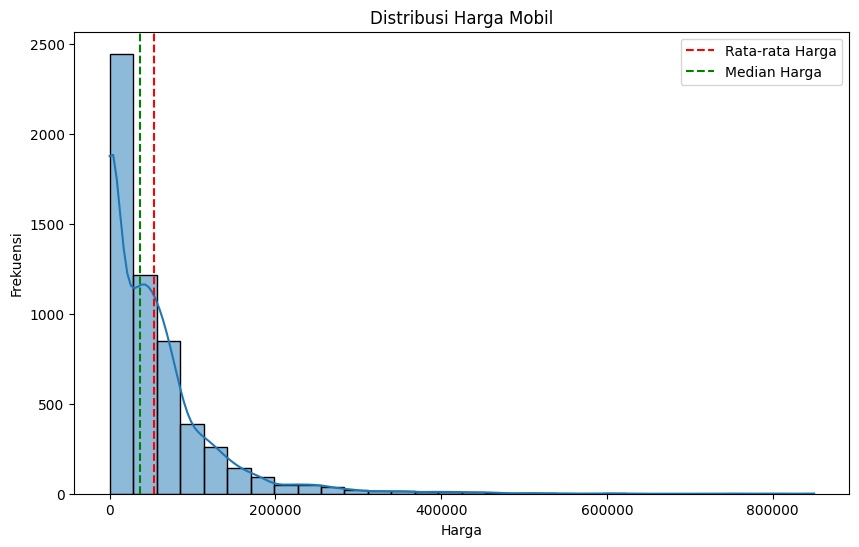

In [6]:
# Analisis distribusi harga
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Mobil')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.axvline(data['Price'].mean(), color='red', linestyle='--', label='Rata-rata Harga')
plt.axvline(data['Price'].median(), color='green', linestyle='--', label='Median Harga')
plt.legend()
plt.show()


### Analisis Distribusi Harga

Hasil dari analisis distribusi harga mobil menunjukkan bagaimana harga mobil terdistribusi dalam dataset. Berikut adalah rincian dari grafik yang dihasilkan:
#### Histogram
- Histogram menunjukkan bahwa sebagian besar mobil memiliki harga yang sangat rendah, dengan banyak entri di sekitar harga 0. Ini mungkin menunjukkan adanya entri dengan harga yang tidak valid atau kesalahan input.
- Sebagian kecil mobil memiliki harga yang lebih tinggi, tetapi frekuensinya jauh lebih rendah dibandingkan dengan mobil yang harganya mendekati 0.

#### Garis Rata-rata dan Median
- **Garis Merah**: Menunjukkan rata-rata harga mobil. Rata-rata ini mungkin dipengaruhi oleh beberapa entri dengan harga yang sangat tinggi.
- **Garis Hijau**: Menunjukkan median harga mobil. Median memberikan gambaran yang lebih baik tentang harga mobil yang umum, karena tidak terpengaruh oleh nilai ekstrem.

#### Konteks Harga 0
- Banyak entri dengan harga 0 terkait dengan kolom "Negotiable" yang bernilai True. Hal ini menunjukkan bahwa harga mobil tersebut mungkin belum ditentukan atau masih dalam proses negosiasi.
- Rencana untuk langkah selanjutnya adalah melakukan koreksi atau pembenahan pada entri harga 0 ini untuk memastikan data yang lebih akurat dan dapat diandalkan.

#### Kesimpulan
- Distribusi harga menunjukkan adanya konsentrasi besar pada harga rendah, dengan beberapa mobil yang memiliki harga tinggi.
- Nilai 0 pada kolom harga ini akan dilakukan pembenahan, sehingga data yang dihasilkan menjadi lebih valid dan representatif.
- Rekomendasi untuk langkah selanjutnya adalah membersihkan data dari entri yang tidak valid dan melakukan analisis lebih mendalam untuk memahami faktor-faktor yang mempengaruhi harga mobil.



## III.Top Brands Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_22524\1144184367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


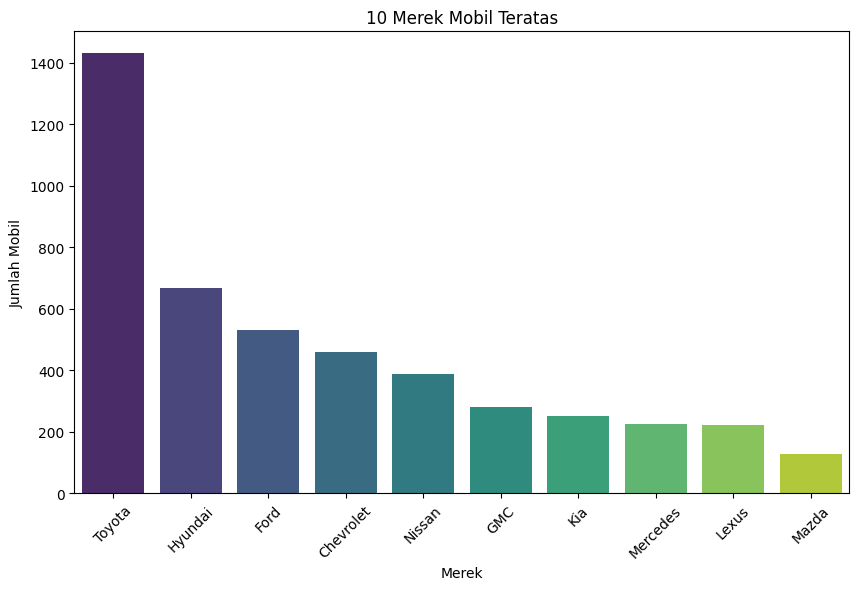

In [7]:
# Top Brands Analysis
top_brands = data['Make'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('10 Merek Mobil Teratas')
plt.xlabel('Merek')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)
plt.show()


### Analisis Merek Teratas

Hasil dari analisis ini memberikan informasi mengenai 10 merek mobil teratas berdasarkan jumlah mobil yang terdaftar dalam dataset. Berikut adalah rincian dari grafik yang dihasilkan:

#### Barplot
- Grafik ini menggunakan barplot untuk memvisualisasikan jumlah mobil dari 10 merek teratas.
- **Merek Teratas**: 
  - **Toyota** muncul sebagai merek dengan jumlah mobil terbanyak, mencapai lebih dari 1400 unit.
  - Merek lain seperti **Hyundai**, **Ford**, dan **Chevrolet** juga menunjukkan jumlah yang signifikan, tetapi jauh di bawah Toyota.
  - Merek seperti **Mazda** dan **Lexus** memiliki jumlah mobil yang lebih rendah dibandingkan dengan merek lainnya.

#### Kesimpulan
- Analisis ini membantu dalam memahami merek mana yang paling banyak tersedia dalam dataset, yang dapat memberikan wawasan tentang preferensi konsumen dan tren pasar.
- Informasi ini dapat digunakan untuk analisis lebih lanjut, seperti membandingkan harga atau fitur mobil berdasarkan merek.
- Dengan Toyota sebagai pemimpin pasar, analisis ini menunjukkan dominasi merek tersebut dalam penjualan mobil bekas.


## IV.Analisis Tahun

C:\Users\user\AppData\Local\Temp\ipykernel_22524\278422061.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Year', palette='viridis')


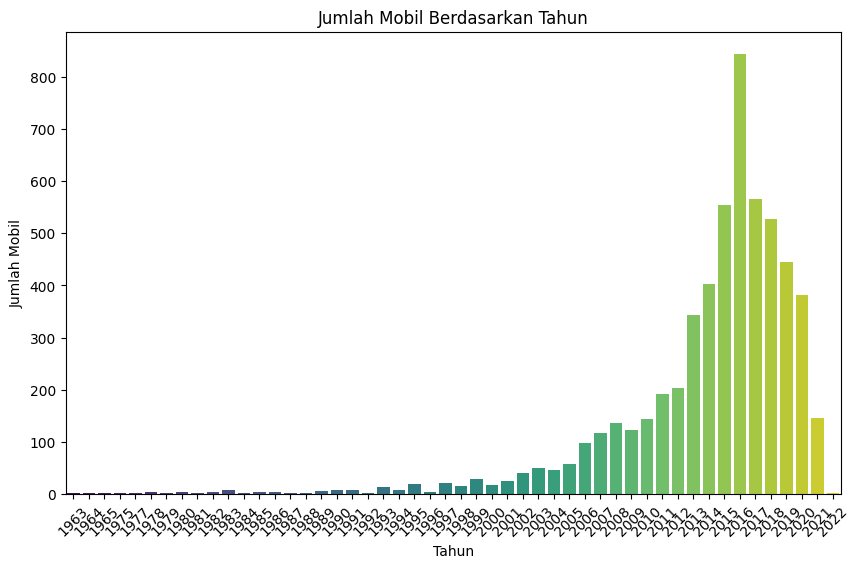

In [8]:
# Analisis Tahun
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Year', palette='viridis')
plt.title('Jumlah Mobil Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)
plt.show()


### Analisis Jumlah Mobil Berdasarkan Tahun

Hasil dari analisis ini memberikan informasi mengenai jumlah mobil yang terdaftar dalam dataset berdasarkan tahun pembuatan. Berikut adalah rincian dari grafik yang dihasilkan:

#### Tren Jumlah Mobil
- Dari grafik, terlihat bahwa jumlah mobil yang terdaftar meningkat secara signifikan dari tahun ke tahun, terutama pada tahun-tahun terakhir.
- Ada lonjakan yang jelas pada tahun-tahun tertentu, menunjukkan bahwa lebih banyak mobil diproduksi dan terdaftar pada tahun-tahun tersebut.
- Tahun-tahun awal (misalnya, 1980-an) menunjukkan jumlah mobil yang jauh lebih rendah dibandingkan dengan tahun-tahun terbaru, yang mencerminkan pertumbuhan industri otomotif.

#### Kesimpulan
- Analisis ini membantu dalam memahami tren pertumbuhan jumlah mobil dari tahun ke tahun, yang dapat memberikan wawasan tentang perkembangan pasar mobil.
- Informasi ini dapat digunakan untuk analisis lebih lanjut, seperti membandingkan harga atau fitur mobil berdasarkan tahun pembuatan.
- Dengan meningkatnya jumlah mobil yang terdaftar, ini juga dapat menunjukkan peningkatan permintaan dan konsumsi mobil di pasar.


## V.Hubungan Mileage dengan Price

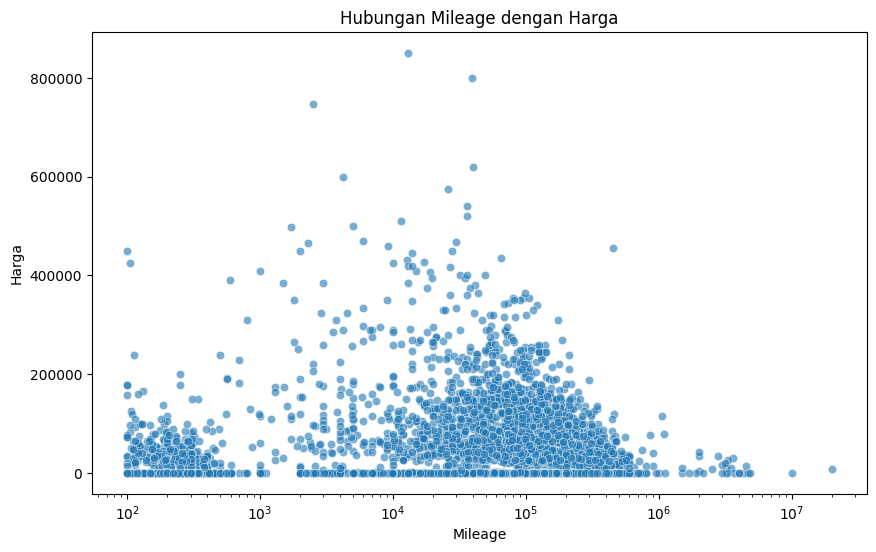

In [9]:
# Hubungan Mileage dengan Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Mileage', y='Price', alpha=0.6)
plt.title('Hubungan Mileage dengan Harga')
plt.xlabel('Mileage')
plt.ylabel('Harga')
plt.xscale('log')  # Menggunakan skala log untuk mileage
plt.show()


### Hubungan Mileage dengan Harga

Hasil dari analisis ini memberikan informasi mengenai hubungan antara mileage (jarak tempuh) mobil dan harga mobil yang terdaftar dalam dataset. Berikut adalah rincian dari grafik yang dihasilkan:

#### Tren Umum
- Dari grafik, terlihat bahwa sebagian besar mobil dengan mileage rendah cenderung memiliki harga yang lebih tinggi. Ini menunjukkan bahwa mobil yang jarang digunakan biasanya lebih mahal.
- Sebaliknya, mobil dengan mileage yang sangat tinggi cenderung memiliki harga yang lebih rendah, mencerminkan penurunan nilai seiring bertambahnya jarak tempuh.
- Terdapat beberapa entri dengan harga yang sangat tinggi meskipun mileage-nya juga tinggi, yang mungkin menunjukkan adanya faktor lain yang mempengaruhi harga, seperti merek, model, atau kondisi mobil.

#### Skala Log
- Sumbu X menggunakan skala logaritmik untuk mileage, yang membantu dalam memperjelas distribusi data, terutama untuk nilai mileage yang sangat besar.

#### Kesimpulan
- Analisis ini membantu dalam memahami bagaimana mileage mempengaruhi harga mobil, yang dapat memberikan wawasan penting bagi pembeli dan penjual.
- Informasi ini dapat digunakan untuk analisis lebih lanjut, seperti menentukan harga yang wajar berdasarkan mileage atau mengevaluasi faktor-faktor lain yang mempengaruhi harga mobil.


## VI.Average Price by Make

C:\Users\user\AppData\Local\Temp\ipykernel_22524\2411562189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_make.index, y=average_price_by_make.values, palette='viridis')


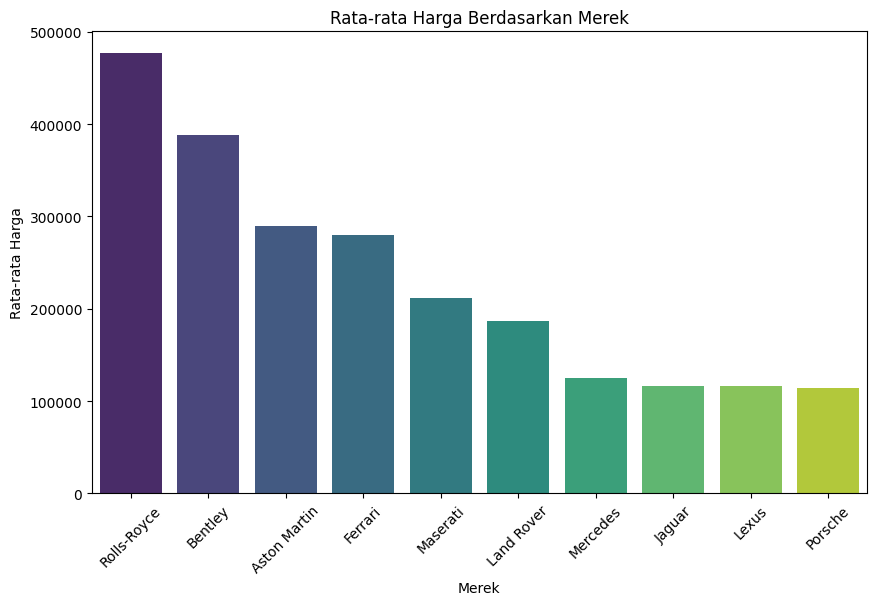

In [10]:
# Average price by make
average_price_by_make = data.groupby('Make')['Price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_make.index, y=average_price_by_make.values, palette='viridis')
plt.title('Rata-rata Harga Berdasarkan Merek')
plt.xlabel('Merek')
plt.ylabel('Rata-rata Harga')
plt.xticks(rotation=45)
plt.show()


### Rata-rata Harga Berdasarkan Merek

Hasil dari analisis ini memberikan informasi mengenai rata-rata harga mobil berdasarkan merek. Berikut adalah rincian dari grafik yang dihasilkan:
#### Merek Teratas
- **Rolls-Royce** muncul sebagai merek dengan rata-rata harga tertinggi, mencapai lebih dari 50.000, menunjukkan bahwa mobil dari merek ini adalah mobil mewah dengan harga yang sangat tinggi.
- Merek lain seperti **Bentley**, **Aston Martin**, dan **Ferrari** juga menunjukkan rata-rata harga yang tinggi, mencerminkan status mereka sebagai merek mobil premium.
- Merek seperti **Mercedes**, **Jaguar**, dan **Lexus** memiliki rata-rata harga yang lebih rendah dibandingkan dengan merek-merek mewah di atas, tetapi masih menunjukkan nilai yang signifikan.

#### Kesimpulan
- Analisis ini membantu dalam memahami bagaimana harga mobil bervariasi berdasarkan merek, yang dapat memberikan wawasan penting bagi pembeli dan penjual.
- Informasi ini dapat digunakan untuk analisis lebih lanjut, seperti membandingkan fitur atau performa mobil berdasarkan merek dan harga.
- Dengan Rolls-Royce sebagai pemimpin dalam rata-rata harga, analisis ini menunjukkan dominasi merek tersebut dalam segmen mobil mewah.


## VII.Distribusi Ukuran Mesin per Manufaktur (10 Merk Terlaris)

C:\Users\user\AppData\Local\Temp\ipykernel_22524\548971761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[data['Make'].isin(top_10_brands)], x='Make', y='Engine_Size', palette='viridis')


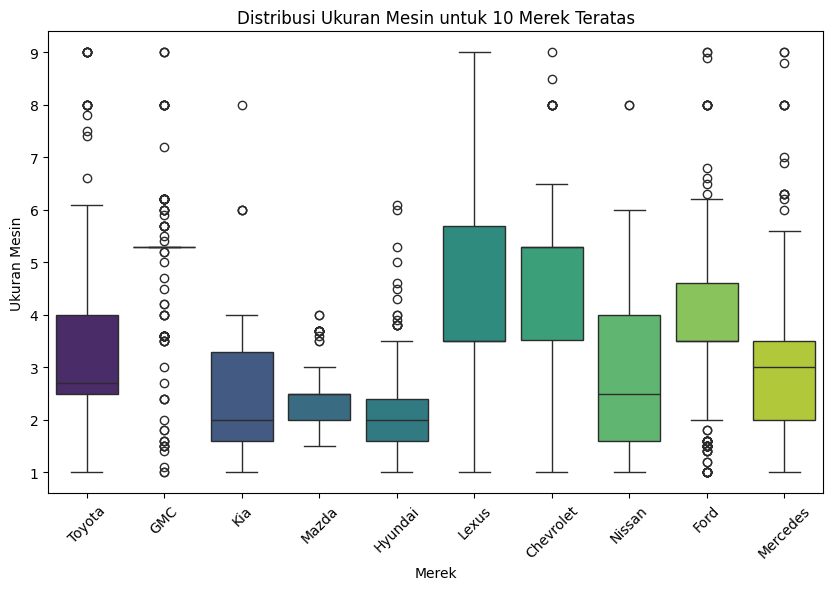

In [11]:
# Distribusi Ukuran Mesin per Manufaktur (10 Merk Terlaris)
top_10_brands = data['Make'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[data['Make'].isin(top_10_brands)], x='Make', y='Engine_Size', palette='viridis')
plt.title('Distribusi Ukuran Mesin untuk 10 Merek Teratas')
plt.xlabel('Merek')
plt.ylabel('Ukuran Mesin')
plt.xticks(rotation=45)
plt.show()


### Distribusi Ukuran Mesin untuk 10 Merek Teratas

Hasil dari analisis ini memberikan informasi mengenai distribusi ukuran mesin mobil untuk 10 merek teratas. Berikut adalah rincian dari grafik yang dihasilkan:

#### Analisis Distribusi
- **Toyota** dan **GMC** menunjukkan ukuran mesin yang lebih rendah dibandingkan dengan merek lainnya, dengan rentang ukuran mesin yang lebih sempit.
- **Chevrolet**, **Nissan**, dan **Ford** memiliki ukuran mesin yang lebih bervariasi, dengan beberapa entri yang menunjukkan ukuran mesin yang lebih besar.
- **Lexus** menunjukkan ukuran mesin yang lebih tinggi secara umum, dengan median yang lebih tinggi dibandingkan merek lainnya.
- Terdapat beberapa outlier (titik di luar whiskers) yang menunjukkan adanya mobil dengan ukuran mesin yang jauh lebih besar dari ukuran rata-rata untuk merek tertentu.

#### Kesimpulan
- Analisis ini membantu dalam memahami bagaimana ukuran mesin bervariasi antara merek-merek mobil teratas, yang dapat memberikan wawasan penting bagi konsumen dalam memilih mobil berdasarkan performa mesin.
- Informasi ini dapat digunakan untuk analisis lebih lanjut, seperti membandingkan efisiensi bahan bakar atau performa berdasarkan ukuran mesin dan merek.
- Dengan variasi ukuran mesin yang terlihat, ini juga menunjukkan bahwa setiap merek memiliki karakteristik dan fokus yang berbeda dalam desain dan produksi mobil.


## VII.Region Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_22524\4065146992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


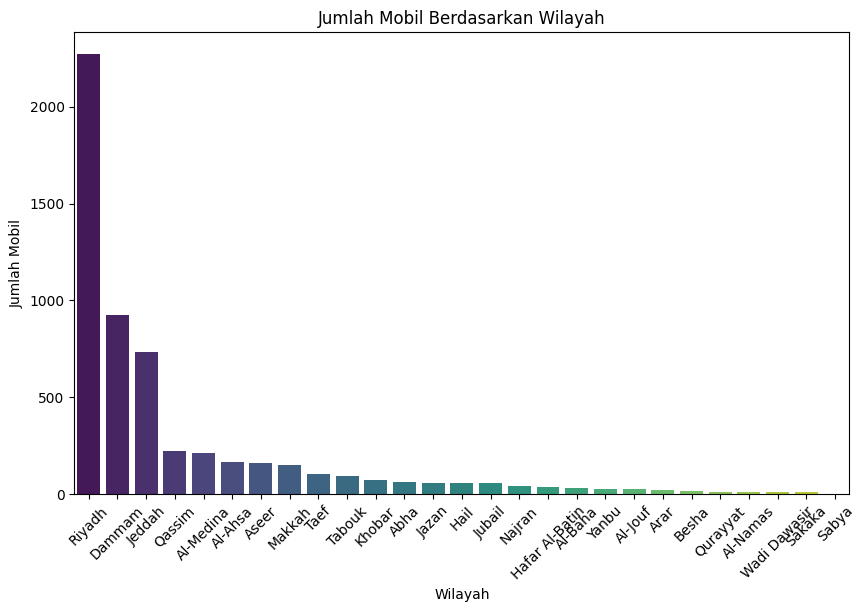

In [12]:
# Region Analysis
region_counts = data['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Jumlah Mobil Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)
plt.show()


### Jumlah Mobil Berdasarkan Wilayah

Hasil dari analisis ini memberikan informasi mengenai jumlah mobil yang terdaftar dalam dataset berdasarkan wilayah. Berikut adalah rincian dari grafik yang dihasilkan:

#### Analisis Distribusi
- **Riyadh** muncul sebagai wilayah dengan jumlah mobil terbanyak, mencapai lebih dari 2000 unit, menunjukkan konsentrasi tinggi mobil di ibu kota.
- **Dammam** dan **Jeddah** juga menunjukkan jumlah yang signifikan, tetapi jauh di bawah Riyadh.
- Wilayah lainnya, seperti **Qassim**, **Al-Medinah**, dan **Aseer**, memiliki jumlah mobil yang lebih rendah, dengan beberapa wilayah menunjukkan angka yang sangat sedikit.

#### Kesimpulan
- Analisis ini membantu dalam memahami distribusi jumlah mobil berdasarkan wilayah, yang dapat memberikan wawasan tentang preferensi konsumen dan tren pasar di berbagai daerah.
- Informasi ini dapat digunakan untuk analisis lebih lanjut, seperti membandingkan harga atau fitur mobil berdasarkan wilayah.
- Dengan Riyadh sebagai wilayah dominan, analisis ini menunjukkan bahwa pasar mobil mungkin lebih aktif di daerah perkotaan dibandingkan dengan daerah pedesaan.


## KESIMPULAN 

### Kesimpulan dan Langkah Selanjutnya

Dari analisis yang telah dilakukan, kita mendapatkan wawasan penting mengenai distribusi harga, merek, ukuran mesin, dan jumlah mobil berdasarkan wilayah. Beberapa poin kunci yang dapat diambil adalah:

1. **Distribusi Harga**: Terdapat konsentrasi harga yang rendah, dengan banyak entri harga 0 yang terkait dengan status "Negotiable". Ini menunjukkan perlunya pembenahan data harga untuk meningkatkan akurasi analisis.

2. **Top Brands Analysis**: Merek seperti Toyota mendominasi pasar, sementara merek mewah seperti Rolls-Royce menunjukkan harga yang jauh lebih tinggi.

3. **Hubungan Mileage dan Harga**: Terdapat tren yang jelas bahwa mobil dengan mileage rendah cenderung memiliki harga yang lebih tinggi, sedangkan mobil dengan mileage tinggi memiliki harga yang lebih rendah.

4. **Distribusi Ukuran Mesin**: Variasi ukuran mesin antara merek menunjukkan karakteristik desain yang berbeda, yang dapat mempengaruhi performa dan efisiensi bahan bakar.

5. **Analisis Wilayah**: Riyadh sebagai wilayah dengan jumlah mobil terbanyak menunjukkan bahwa pasar mobil lebih aktif di daerah perkotaan.

Dengan wawasan ini, langkah selanjutnya adalah melakukan beberapa proses pembersihan dan transformasi data untuk mempersiapkan data sebelum pemodelan. Berikut adalah langkah-langkah yang akan diambil:

1. **Mengisi Harga yang Hilang**: Kita akan mengisi nilai harga yang hilang berdasarkan harga mobil serupa yang memiliki status "Negotiable". Proses ini akan mempertimbangkan merek, tahun, dan mileage untuk menemukan mobil yang paling mirip dan menggunakan harga dari mobil tersebut untuk mengisi nilai yang hilang.


2. **Menambahkan Fitur Log dan Usia Mobil**: Fitur log dari harga dan usia mobil akan ditambahkan untuk analisis yang lebih mendalam.

3. **Kategorisasi**: Data akan dikategorikan berdasarkan mileage, ukuran mesin, dan usia mobil untuk memudahkan analisis lebih lanjut.

4. **Menghapus Outlier**: Outlier akan dihapus untuk meningkatkan kualitas data dan akurasi model.

5. **Menambahkan Fitur Interaksi**: Fitur interaksi antara ukuran mesin dan mileage akan ditambahkan untuk menangkap hubungan yang lebih kompleks.

6. **Memisahkan Data untuk Model Regresi**: Data akan dipisahkan menjadi fitur dan target untuk persiapan pemodelan.

7. **Normalisasi dan Transformasi Data**: Data akan dinormalisasi dan dikategorikan untuk mempersiapkan model regresi.

8. **Membuat Pipeline Lengkap dengan Model**: Model regresi akan dibangun menggunakan untuk memprediksi harga mobil.

9. **Hyperparameter Tuning dan K-Fold Cross Validation**: Proses tuning hyperparameter dan validasi silang akan dilakukan untuk meningkatkan performa model.

10. **Evaluasi Model**: Model akan dievaluasi menggunakan metrik seperti Mean Absolute Error (MAE) dan R-squared (R²) untuk menilai akurasi prediksi.

Dengan langkah-langkah ini, kita akan dapat 


# 5.Isi Nilai 0 Pada Price 

In [13]:
def fill_price(row):
    if row['Price'] == 0 and row['Negotiable']:
        similar_cars = data[
            (data['Make'] == row['Make']) &
            (data['Year'] == row['Year']) &
            (data['Mileage'] <= row['Mileage'] + 5000) &
            (data['Mileage'] >= row['Mileage'] - 5000)
        ]
        return similar_cars['Price'].median() if not similar_cars.empty else row['Price']
    return row['Price']

data['Price'] = data.apply(fill_price, axis=1)
print("Price column filled for negotiable cars.")



Price column filled for negotiable cars.


### Alasan Menggunakan Median untuk Mengisi Nilai 0 pada Kolom Price

Dalam proses pengisian nilai 0 pada kolom Price untuk mobil dengan status "Negotiable", saya menggunakan median harga dari mobil serupa berdasarkan kriteria berikut:

1. **Merek (Make)**:
   - Merek mobil sering kali mempengaruhi harga. Mobil dari merek yang sama biasanya memiliki harga yang serupa. Dengan membatasi pencarian pada merek yang sama, saya dapat memastikan bahwa harga yang digunakan untuk pengisian adalah representatif dari mobil yang sebanding.

2. **Tahun (Year)**:
   - Tahun pembuatan mobil juga merupakan faktor penting dalam menentukan harga. Mobil yang lebih baru cenderung memiliki harga yang lebih tinggi dibandingkan dengan mobil yang lebih tua. Dengan mempertimbangkan tahun, saya dapat mengisi nilai harga dengan lebih akurat, mencerminkan depresiasi dan tren harga di pasar.

3. **Mileage**:
   - Mileage atau jarak tempuh mobil adalah indikator penting dari kondisi mobil. Mobil dengan jarak tempuh yang lebih rendah biasanya memiliki harga yang lebih tinggi. Dengan membatasi pencarian pada mobil dengan mileage yang serupa (dalam rentang ±5000), saya dapat memastikan bahwa harga yang digunakan untuk pengisian mencerminkan kondisi dan penggunaan mobil yang sebanding.

### Mengapa Menggunakan Median?

- **Stabilitas**: Median adalah ukuran yang lebih stabil dibandingkan rata-rata, terutama ketika data memiliki outlier. Dalam konteks harga mobil, ada kemungkinan adanya harga ekstrem yang dapat mempengaruhi rata-rata. Dengan menggunakan median, saya dapat mengurangi dampak dari harga yang tidak biasa.

- **Representatif**: Median memberikan nilai tengah dari dataset, yang berarti setengah dari mobil serupa memiliki harga di bawah median dan setengah lainnya di atas. Ini membuat median menjadi representasi yang lebih baik dari harga yang wajar untuk mobil dalam kategori yang sama.

### Kesimpulan

Dengan menggunakan median berdasarkan merek, tahun, dan mileage, saya dapat mengisi nilai harga yang hilang dengan cara yang lebih relevan dan akurat. Pendekatan ini tidak hanya meningkatkan kualitas data, tetapi juga memastikan bahwa analisis dan model yang dibangun di atas data tersebut lebih dapat diandalkan.


In [47]:
data[['Make', 'Year', 'Mileage', 'Price']].head()



,Make,Year,Mileage,Price
3,Kia,2015,220000,42000.0
5,Mazda,2019,25000,58000.0
6,Porsche,2012,189000,85000.0
7,Hyundai,2016,155,48000.0
8,Toyota,2016,110864,81500.0


# 6.Melakukan log dan penambahan usia mobil

In [14]:
data['Log_Price'] = np.log1p(data['Price'].replace(0, np.nan))
data['Age of Car'] = 2024 - data['Year']
print("Log_Price and Age of Car features added.")

Log_Price and Age of Car features added.


### Alasan Melakukan Ini

- **Mengurangi Skewness**: Transformasi logaritma membantu mengurangi skewness dalam distribusi harga, membuat data lebih mendekati distribusi normal. Ini penting untuk analisis statistik dan pemodelan regresi.
  
- **Meningkatkan Interpretabilitas**: Dengan menggunakan log harga, model dapat lebih mudah menginterpretasikan perubahan persentase dalam harga, yang sering kali lebih relevan dalam konteks ekonomi.

- **Menambah Fitur Penting**: Menambahkan usia mobil sebagai fitur memberikan informasi tambahan yang dapat membantu model dalam memprediksi harga, karena usia sering kali berpengaruh pada nilai jual mobil.

Langkah-langkah ini penting untuk meningkatkan kualitas data dan akurasi model dalam analisis dan prediksi harga mobil.

# 7.Kategorisasi

In [15]:
data['Mileage_Category'] = data['Mileage'].apply(lambda x: 'Low' if x < 50000 else ('Medium' if x < 150000 else 'High'))
data['Engine_Size_Category'] = data['Engine_Size'].apply(lambda x: 'Small' if x < 1.5 else ('Medium' if x < 3.0 else 'Large'))
data['Car_Age_Category'] = data['Age of Car'].apply(lambda x: 'New' if x <= 3 else ('Moderately Used' if x <= 7 else 'Old'))
print("Categorical features added.")


Categorical features added.



### Alasan Melakukan Kategorisasi:

1. **Meningkatkan Interpretabilitas**:
   - Kategorisasi membantu dalam memahami data dengan lebih baik. Misalnya, mengganti nilai mileage dengan kategori seperti 'Low', 'Medium', dan 'High' membuat analisis lebih intuitif.

2. **Memudahkan Analisis**:
   - Dengan mengelompokkan data ke dalam kategori, kita dapat dengan mudah melakukan analisis dan visualisasi. Ini memungkinkan kita untuk melihat pola dan tren yang mungkin tidak terlihat dalam data numerik.

3. **Meningkatkan Kinerja Model**:
   - Banyak algoritma pembelajaran mesin dapat bekerja lebih baik dengan fitur kategorikal. Kategorisasi dapat membantu model dalam menangkap hubungan yang lebih kompleks antara fitur dan target.

4. **Pengurangan Dimensi**:
   - Kategorisasi dapat membantu mengurangi dimensi data, yang dapat mempercepat proses pelatihan model dan mengurangi risiko overfitting.

5. **Fleksibilitas dalam Pemodelan**:
   - Kategori yang ditambahkan dapat digunakan dalam model regresi atau klasifikasi, memberikan fleksibilitas dalam pendekatan analisis yang diambil.

Dengan langkah-langkah ini, kita dapat meningkatkan kualitas data dan hasil analisis yang lebih baik dalam konteks prediksi harga mobil.


# 8.Menghapus Outliers

In [16]:
# Tampilkan Data Sebelum Menghapus Outliers
print("Data Sebelum Menghapus Outliers:")
print(data.describe())



Data Sebelum Menghapus Outliers:
              Year  Engine_Size       Mileage          Price    Log_Price  \
count  5620.000000  5620.000000  5.620000e+03    5620.000000  4518.000000   
mean   2014.100356     3.296299  1.509222e+05   59072.246797    10.843420   
std       5.793003     1.515253  3.829633e+05   69327.252374     0.940625   
min    1963.000000     1.000000  1.000000e+02       0.000000     0.693147   
25%    2012.000000     2.000000  3.800000e+04   15000.000000    10.373522   
50%    2016.000000     3.000000  1.030000e+05   43000.000000    10.915107   
75%    2018.000000     4.500000  1.960000e+05   75000.000000    11.371371   
max    2022.000000     9.000000  2.000000e+07  850000.000000    13.652993   

        Age of Car  
count  5620.000000  
mean      9.899644  
std       5.793003  
min       2.000000  
25%       6.000000  
50%       8.000000  
75%      12.000000  
max      61.000000  


In [17]:
numeric_columns = ['Age of Car', 'Engine_Size', 'Mileage', 'Price', 'Log_Price']
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
print("Outliers removed.")


Outliers removed.


In [18]:
# Tampilkan Data Setelah Menghapus Outliers
print("Data Setelah Menghapus Outliers:")
print(data.describe())

Data Setelah Menghapus Outliers:
              Year  Engine_Size        Mileage          Price    Log_Price  \
count  3809.000000  3809.000000    3809.000000    3809.000000  3809.000000   
mean   2015.401943     3.059543  123374.918876   60587.119716    10.845245   
std       3.444473     1.359992   94555.854004   34355.701593     0.598092   
min    2003.000000     1.000000     100.000000    9000.000000     9.105091   
25%    2014.000000     2.000000   52329.000000   35000.000000    10.463132   
50%    2016.000000     2.700000  105739.000000   54000.000000    10.896758   
75%    2018.000000     4.000000  180000.000000   77500.000000    11.258046   
max    2021.000000     7.000000  410000.000000  163000.000000    12.001512   

        Age of Car  
count  3809.000000  
mean      8.598057  
std       3.444473  
min       3.000000  
25%       6.000000  
50%       8.000000  
75%      10.000000  
max      21.000000  


## Analisis Outliers dalam Data

### Data Sebelum Menghapus Outliers

Dari ringkasan statistik berikut:

- **Price**:
  - **Min**: 0.00
  - **Max**: 850000.00
  - **Mean**: 59072.25
  - **Std**: 69327.25

- **Mileage**:
  - **Min**: 100.00
  - **Max**: 20000000.00
  - **Mean**: 159922.22
  - **Std**: 382963.67

- **Age of Car**:
  - **Min**: 0.00
  - **Max**: 61.00
  - **Mean**: 9.90
  - **Std**: 5.79

### Identifikasi Outliers

1. **Price**:
   - Nilai minimum yang sangat rendah (0.00) menunjukkan adanya outlier, karena harga mobil tidak seharusnya nol.
   - Nilai maksimum (850000.00) juga menunjukkan potensi outlier, karena jauh lebih tinggi dari rata-rata.

2. **Mileage**:
   - Nilai maksimum (20000000.00) sangat tinggi dibandingkan dengan rata-rata (159922.22), menunjukkan adanya outlier yang ekstrem.

3. **Age of Car**:
   - Nilai maksimum (61.00) menunjukkan bahwa ada mobil yang sangat tua, yang mungkin tidak representatif untuk analisis.

### Data Setelah Menghapus Outliers

Setelah penghapusan outliers, ringkasan statistik menunjukkan:

- **Price**:
  - **Min**: 9000.00
  - **Max**: 163000.00
  - **Mean**: 60587.12
  - **Std**: 34355.70

- **Mileage**:
  - **Min**: 100.00
  - **Max**: 410000.00
  - **Mean**: 123374.92
  - **Std**: 94555.85

- **Age of Car**:
  - **Min**: 2.00
  - **Max**: 21.00
  - **Mean**: 8.60
  - **Std**: 3.44

### Alasan Menghapus Outliers

1. **Meningkatkan Kualitas Data**:
   - Outliers dapat memberikan hasil yang tidak akurat dalam analisis dan pemodelan. Menghapusnya membantu memastikan bahwa data yang digunakan lebih representatif.

2. **Meningkatkan Akurasi Model**:
   - Model pembelajaran mesin dapat terpengaruh oleh outliers, yang dapat menyebabkan overfitting. Dengan menghapus outliers, model dapat belajar dari pola yang lebih relevan.

3. **Memudahkan Interpretasi**:
   - Data yang bersih dari outliers lebih mudah untuk dianalisis dan diinterpretasikan, memberikan wawasan yang lebih jelas tentang tren dan pola dalam dataset.

Dengan menghapus outliers, kita dapat meningkatkan kualitas dan akurasi analisis serta model yang dibangun dari data tersebut.


# 9.Menambahkan fitur Interaksi

In [19]:
data['Engine_Mileage_Interaction'] = data['Engine_Size'] * data['Mileage']
print("Engine_Mileage_Interaction feature added.")


Engine_Mileage_Interaction feature added.



### Alasan Membuat Fitur Interaksi

1. **Menangkap Hubungan Non-Linear**:
   - Fitur interaksi membantu dalam menangkap hubungan non-linear antara dua variabel. Dalam konteks ini, interaksi antara ukuran mesin dan mileage dapat memberikan wawasan tambahan tentang bagaimana kedua faktor tersebut saling mempengaruhi harga mobil.

2. **Meningkatkan Kinerja Model**:
   - Dengan menambahkan fitur interaksi, model pembelajaran mesin dapat lebih baik dalam memprediksi target (misalnya, harga mobil) karena dapat mempertimbangkan efek gabungan dari dua variabel.

3. **Memberikan Informasi Tambahan**:
   - Fitur interaksi dapat memberikan informasi tambahan yang mungkin tidak terlihat jika hanya mempertimbangkan variabel secara terpisah. Misalnya, ukuran mesin yang lebih besar mungkin memiliki dampak yang berbeda pada harga tergantung pada mileage mobil.

4. **Meningkatkan Interpretabilitas**:
   - Fitur interaksi dapat membantu dalam memahami bagaimana kombinasi dari dua variabel mempengaruhi hasil, memberikan wawasan yang lebih dalam tentang faktor-faktor yang mempengaruhi harga mobil.

Dengan menambahkan fitur interaksi ini, kita dapat meningkatkan kualitas analisis dan akurasi model yang dibangun dari data tersebut.


# 10.Pemisahan Data Untuk Model Regresi

In [20]:
regression_data = data[data['Price'] > 0]  # Hanya menggunakan baris dengan harga valid
X = regression_data[['Age of Car', 'Engine_Size', 'Mileage', 'Engine_Mileage_Interaction', 
                     'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 
                     'Mileage_Category', 'Engine_Size_Category', 'Car_Age_Category']]  # Fitur
y = regression_data['Log_Price']  # Target
print(f"Features and target separated. Features shape: {X.shape}, Target shape: {y.shape}")


Features and target separated. Features shape: (3809, 12), Target shape: (3809,)



### Alasan Pemisahan Data

1. **Fokus pada Data Valid**:
   - Dengan hanya menggunakan baris di mana harga lebih besar dari 0, kita memastikan bahwa model hanya dilatih pada data yang valid dan relevan. Ini penting untuk menghindari bias yang dapat muncul dari data yang tidak valid.

2. **Struktur Data yang Jelas**:
   - Memisahkan fitur (`X`) dan target (`y`) memberikan struktur yang jelas untuk data yang akan digunakan dalam model. Ini memudahkan dalam proses pelatihan model dan evaluasi.

3. **Meningkatkan Kinerja Model**:
   - Dengan memilih fitur yang relevan, kita dapat meningkatkan kinerja model. Fitur yang dipilih mencakup informasi penting yang dapat membantu model dalam memprediksi harga mobil.

4. **Memudahkan Proses Pelatihan**:
   - Pemisahan ini memudahkan dalam proses pelatihan model regresi, karena kita dapat dengan mudah mengoperasikan data fitur dan target ke dalam algoritma pembelajaran mesin.

5. **Mendukung Analisis Selanjutnya**:
   - Dengan memisahkan fitur dan target, kita dapat melakukan analisis lebih lanjut, seperti evaluasi model, tuning hyperparameter, dan validasi silang, dengan lebih efisien.

Dengan langkah-langkah ini, kita dapat memastikan bahwa data yang digunakan untuk pelatihan model regresi adalah berkualitas tinggi dan terstruktur dengan baik.


# 11.Normalisasi dan Transformasi data

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['Age of Car', 'Engine_Size', 'Mileage', 'Engine_Mileage_Interaction']
categorical_features = ['Region', 'Make', 'Gear_Type', 'Origin', 'Options', 
                        'Mileage_Category', 'Engine_Size_Category', 'Car_Age_Category']

# Pipeline untuk preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
print("Preprocessing pipeline created.")


Preprocessing pipeline created.



### Alasan Membuat Pipeline Preprocessing

1. **Meningkatkan Kualitas Data**:
   - Normalisasi dan transformasi data membantu dalam meningkatkan kualitas data yang akan digunakan dalam model. Misalnya, `StandardScaler` mengubah fitur numerik agar memiliki rata-rata 0 dan deviasi standar 1, yang penting untuk algoritma yang sensitif terhadap skala.

2. **Mengelola Fitur Kategorikal**:
   - `OneHotEncoder` digunakan untuk mengubah fitur kategorikal menjadi format yang dapat digunakan oleh model. Ini penting karena banyak algoritma pembelajaran mesin tidak dapat menangani data kategorikal secara langsung.

3. **Menyederhanakan Proses**:
   - Dengan menggunakan pipeline, kita dapat menggabungkan beberapa langkah preprocessing menjadi satu objek. Ini menyederhanakan proses pelatihan model dan membuat kode lebih terstruktur dan mudah dibaca.

4. **Meningkatkan Reproduksibilitas**:
   - Pipeline memastikan bahwa langkah-langkah preprocessing diterapkan secara konsisten setiap kali data diproses, yang meningkatkan reproduksibilitas hasil.

5. **Memudahkan Pengujian dan Validasi**:
   - Dengan pipeline, kita dapat dengan mudah menguji dan memvalidasi model dengan data yang telah diproses, tanpa perlu mengulangi langkah-langkah preprocessing secara manual.

Dengan langkah-langkah ini, kita dapat memastikan bahwa data yang digunakan untuk pelatihan model adalah berkualitas tinggi dan siap untuk analisis lebih lanjut.


# Pengecekan Model

## Deskripsi Pengujian Model


Dalam analisis ini, saya melakukan pengujian model menggunakan tiga algoritma pembelajaran mesin yang populer: **CatBoost**, **XGBoost**, dan **Random Forest**. Pemilihan ketiga model ini didasarkan pada beberapa alasan berikut:

1. **Kinerja yang Terbukti**:
   - **CatBoost** dan **XGBoost** adalah algoritma boosting yang telah terbukti efektif dalam berbagai kompetisi dan aplikasi dunia nyata. Keduanya dirancang untuk menangani data yang kompleks dan memiliki kemampuan untuk mengurangi overfitting, sehingga sering kali menghasilkan model yang lebih akurat.

2. **Kemampuan Menangani Data Kategorikal**:
   - **CatBoost** memiliki keunggulan dalam menangani fitur kategorikal tanpa perlu melakukan encoding manual. Ini membuatnya sangat efisien dan mudah digunakan dalam situasi di mana data kategorikal banyak terdapat.

3. **Fleksibilitas dan Interpretabilitas**:
   - **Random Forest** adalah algoritma ensemble yang menggunakan banyak pohon keputusan untuk meningkatkan akurasi dan mengurangi varians. Model ini juga memberikan interpretabilitas yang lebih baik melalui fitur penting, yang membantu dalam memahami faktor-faktor yang mempengaruhi prediksi.

4. **Perbandingan yang Relevan**:
   - Dengan menguji ketiga model ini, saya dapat membandingkan kinerja mereka dalam hal akurasi, kecepatan, dan kemampuan generalisasi. Ini memberikan wawasan yang lebih dalam tentang model mana yang paling sesuai untuk dataset yang digunakan.

5. **Dukungan Komunitas dan Dokumentasi**:
   - Ketiga algoritma ini memiliki dukungan komunitas yang kuat dan dokumentasi yang luas, memudahkan saya untuk menemukan sumber daya dan bantuan saat mengimplementasikan model.

#### Metodologi

Saya menggunakan **Pipeline** untuk menyusun langkah-langkah preprocessing dan pelatihan model secara terstruktur. Pipeline ini memungkinkan saya untuk mengelola transformasi data dan pelatihan model dalam satu kesatuan, sehingga memudahkan pengujian dan penerapan model.

**RandomizedSearchCV** digunakan untuk melakukan hyperparameter tuning. Metode ini melakukan pencarian acak di ruang hyperparameter, memungkinkan eksplorasi yang lebih cepat dan efisien dibandingkan dengan GridSearchCV. Ini membantu dalam menemukan kombinasi parameter yang optimal untuk setiap model.

Saya juga menerapkan **K-Fold Cross Validation** untuk memastikan bahwa model diuji secara menyeluruh. Dengan membagi data menjadi beberapa subset, saya dapat mengevaluasi kinerja model pada berbagai bagian data, yang memberikan estimasi kinerja yang lebih andal dan mengurangi varians dalam evaluasi.

#### Evaluasi Model

Setelah pelatihan, setiap model dievaluasi menggunakan metrik berikut:

- **Mean Absolute Error (MAE)**: Mengukur rata-rata kesalahan absolut antara prediksi dan nilai aktual.
- **R-squared (R²)**: Menunjukkan proporsi variasi dalam data yang dapat dijelaskan oleh model.
- **Mean Relative Error (MRE)**: Mengukur kesalahan relatif rata-rata dari prediksi model dalam konteks proporsional.

Saya juga melakukan analisis residual untuk memeriksa distribusi kesalahan prediksi, yang membantu dalam memahami apakah model memiliki bias sistematis.

#### Kesimpulan

Dengan melakukan pengujian ini, saya berharap dapat menemukan model yang paling efektif untuk memprediksi harga mobil berdasarkan fitur-fitur yang tersedia dalam dataset. Setiap model diuji secara terpisah, dan hasilnya akan dievaluasi untuk menentukan model terbaik berdasarkan metrik yang telah disebutkan.


## 1.Catboost

### Pembuatan Pipeline Catboost

In [22]:
from catboost import CatBoostRegressor

catboost_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(silent=True))
])
print("CatBoost model pipeline created.")


CatBoost model pipeline created.


### Hyperparameter Tuning Menggunakan RandomizedSearchCV untuk CatBoost

In [23]:
from sklearn.model_selection import RandomizedSearchCV

catboost_param_distributions = {
    'regressor__depth': [4, 6, 8, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__iterations': [100, 200, 300],
    'regressor__l2_leaf_reg': [1, 3, 5, 7]
}
print("CatBoost hyperparameter tuning parameters defined.")


CatBoost hyperparameter tuning parameters defined.


### K-Fold Cross Validation untuk CatBoost

In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
catboost_random_search = RandomizedSearchCV(catboost_model_pipeline, catboost_param_distributions, n_iter=20, cv=kf, scoring='neg_mean_absolute_error', random_state=42)
print("RandomizedSearchCV for CatBoost initialized.")


RandomizedSearchCV for CatBoost initialized.


### Melatih Model CatBoost dan Prediksi harga pada data uji 

In [25]:
catboost_random_search.fit(X, y)
y_pred_catboost = catboost_random_search.predict(X)
print("CatBoost model trained successfully.")
print("Predictions made on the training data with CatBoost.")

CatBoost model trained successfully.
Predictions made on the training data with CatBoost.


### Evaluasi Model CatBoost

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score
mre_catboost = np.mean(np.abs((np.expm1(y) - np.expm1(y_pred_catboost)) / np.expm1(y))) * 100  # Dalam persen
mae_catboost = mean_absolute_error(np.expm1(y), np.expm1(y_pred_catboost))  # Menggunakan expm1 untuk mengembalikan log transformasi
r2_catboost = r2_score(np.expm1(y), np.expm1(y_pred_catboost))
print(f'CatBoost - Mean Absolute Error (MAE): {mae_catboost}')
print(f'CatBoost - R-squared (R²): {r2_catboost:.2f}')
print(f'CatBoost - Mean Relative Error (MRE): {mre_catboost:.2f}%')


CatBoost - Mean Absolute Error (MAE): 9343.634317594411
CatBoost - R-squared (R²): 0.84
CatBoost - Mean Relative Error (MRE): 17.45%


### Analisis Residual untuk CatBoost

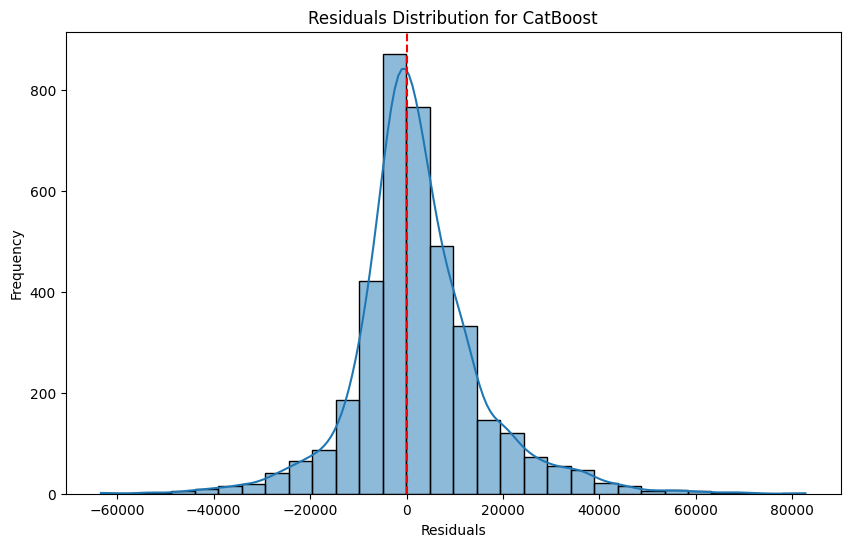

Residuals distribution plotted for CatBoost.


In [27]:
residuals_catboost = np.expm1(y) - np.expm1(y_pred_catboost)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_catboost, bins=30, kde=True)
plt.title('Residuals Distribution for CatBoost')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()
print("Residuals distribution plotted for CatBoost.")


### Hasil Analisa

#### Interpretasi Analisis Residual untuk CatBoost

1. **Mean Absolute Error (MAE)**: 
   - Nilai MAE sebesar 9343.63 menunjukkan bahwa, rata-rata, prediksi model CatBoost menyimpang sekitar 9343.63 unit dari nilai aktual. Ini memberikan gambaran tentang seberapa akurat model dalam memprediksi harga. Dalam Konteks harga jual mobil bekas yang termaksud wajar karena fluktuasi harga 

2. **R-squared (R²)**: 
   - Nilai R² sebesar 0.84 menunjukkan bahwa 84% variasi dalam harga dapat dijelaskan oleh model. Ini menunjukkan bahwa model CatBoost memiliki kinerja yang baik dalam menjelaskan data.

3. **Mean Relative Error (MRE)**: 
   - MRE sebesar 17.45% menunjukkan bahwa kesalahan relatif rata-rata dari prediksi model adalah sekitar 17.45%. Ini memberikan indikasi tambahan tentang akurasi model dalam konteks proporsional. Cukup wajar pada kontekks pasar jual mobil bekas 

4. **Distribusi Residual**:
   - Histogram residual menunjukkan distribusi residual model. Bentuk distribusi yang mendekati normal dengan puncak di sekitar 0 menunjukkan bahwa model tidak memiliki bias sistematis dalam prediksi. 
   - Garis merah putus-putus pada nilai 0 menunjukkan bahwa sebagian besar residual berada di sekitar nilai ini, yang berarti prediksi model cenderung akurat.

5. **Asimetri Residual**:
   - Meskipun distribusi residual tampak simetris, ada sedikit kecenderungan ke arah nilai positif, yang menunjukkan bahwa model mungkin sedikit lebih cenderung untuk meremehkan harga daripada melebih-lebihkan.

#### Kesimpulan
Secara keseluruhan, model CatBoost menunjukkan kinerja yang baik dengan MAE yang relatif rendah, R² yang tinggi, dan distribusi residual yang mendekati normal. Ini menunjukkan bahwa model dapat diandalkan untuk memprediksi harga mobil dalam dataset yang digunakan.


## 2.XGBoost

### Pembuatan Pipeline XGBoost

In [28]:
from xgboost import XGBRegressor

xgboost_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])
print("XGBoost model pipeline created.")


XGBoost model pipeline created.


### Hyperparameter Tuning Menggunakan RandomizedSearchCV untuk XGBoost

In [29]:
xgboost_param_distributions = {
    'regressor__max_depth': [3, 5, 7, 9],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__subsample': [0.6, 0.8, 1.0]
}
print("XGBoost hyperparameter tuning parameters defined.")


XGBoost hyperparameter tuning parameters defined.


### K-Fold Cross Validation untuk XGBoost

In [30]:
xgboost_random_search = RandomizedSearchCV(xgboost_model_pipeline, xgboost_param_distributions, n_iter=20, cv=kf, scoring='neg_mean_absolute_error', random_state=42)
print("RandomizedSearchCV for XGBoost initialized.")


RandomizedSearchCV for XGBoost initialized.


### Melatih Model XGBoost dan Prediksi harga pada data uji 

In [31]:
xgboost_random_search.fit(X, y)
y_pred_xgboost = xgboost_random_search.predict(X)
print("XGBoost model trained successfully.")
print("Predictions made on the training data with XGBoost.")


XGBoost model trained successfully.
Predictions made on the training data with XGBoost.


### Evaluasi Model XGBoost

In [32]:
mae_xgboost = mean_absolute_error(np.expm1(y), np.expm1(y_pred_xgboost))
r2_xgboost = r2_score(np.expm1(y), np.expm1(y_pred_xgboost))
mre_xgboost = np.mean(np.abs((np.expm1(y) - np.expm1(y_pred_xgboost)) / np.expm1(y))) * 100
print(f'XGBoost - Mean Absolute Error (MAE): {mae_xgboost}')
print(f'XGBoost - R-squared (R²): {r2_xgboost:.2f}')
print(f'XGBoost - Mean Relative Error (MRE): {mre_xgboost:.2f}%')


XGBoost - Mean Absolute Error (MAE): 7209.041409685531
XGBoost - R-squared (R²): 0.90
XGBoost - Mean Relative Error (MRE): 12.91%


### Analisis Residual untuk XGBoost

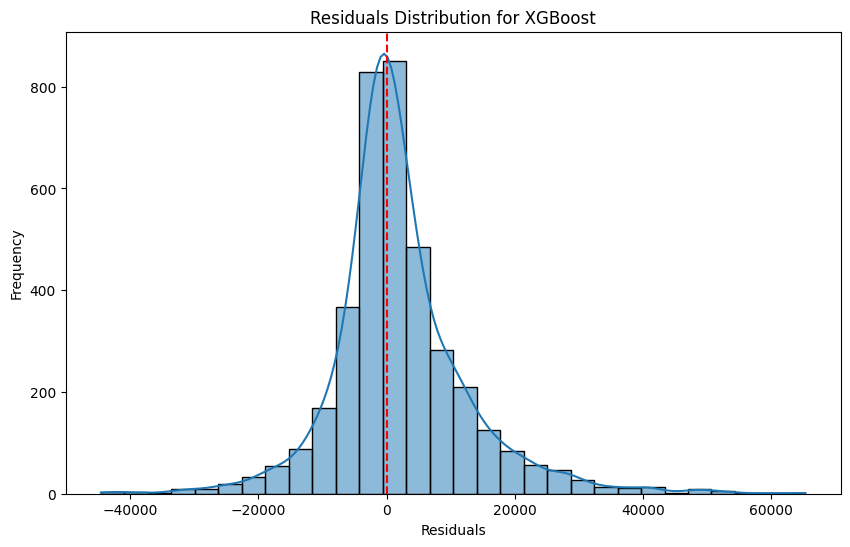

Residuals distribution plotted for XGBoost.


In [33]:
residuals_xgboost = np.expm1(y) - np.expm1(y_pred_xgboost)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgboost, bins=30, kde=True)
plt.title('Residuals Distribution for XGBoost')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()
print("Residuals distribution plotted for XGBoost.")


### Hasil Analisa

#### Interpretasi Analisis Residual untuk XGBoost

1. **Mean Absolute Error (MAE)**: 
   - Nilai MAE sebesar 7209.04 menunjukkan bahwa, rata-rata, prediksi model XGBoost menyimpang sekitar 7209.04 unit dari nilai aktual. Ini menunjukkan bahwa model memiliki akurasi yang baik dalam memprediksi harga.

2. **R-squared (R²)**: 
   - Nilai R² sebesar 0.90 menunjukkan bahwa 90% variasi dalam harga dapat dijelaskan oleh model. Ini menunjukkan bahwa model XGBoost sangat efektif dalam menjelaskan data.

3. **Mean Relative Error (MRE)**: 
   - MRE sebesar 12.91% menunjukkan bahwa kesalahan relatif rata-rata dari prediksi model adalah sekitar 12.91%. Ini memberikan indikasi tambahan tentang akurasi model dalam konteks proporsional.

4. **Distribusi Residual**:
   - Histogram residual menunjukkan distribusi residual model. Bentuk distribusi yang mendekati normal dengan puncak di sekitar 0 menunjukkan bahwa model tidak memiliki bias sistematis dalam prediksi.
   - Garis merah putus-putus pada nilai 0 menunjukkan bahwa sebagian besar residual berada di sekitar nilai ini, yang berarti prediksi model cenderung akurat.

5. **Asimetri Residual**:
   - Distribusi residual tampak simetris, menunjukkan bahwa model tidak cenderung meremehkan atau melebih-lebihkan harga secara signifikan.

#### Kesimpulan
Secara keseluruhan, model XGBoost menunjukkan kinerja yang sangat baik dengan MAE yang rendah, R² yang tinggi, dan distribusi residual yang mendekati normal. Ini menunjukkan bahwa model dapat diandalkan untuk memprediksi harga mobil dalam dataset yang digunakan.


## 3.Random Forest

### Pembuatan Pipeline RandomForest

In [34]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])
print("Random Forest model pipeline created.")


Random Forest model pipeline created.


### Hyperparameter Tuning Menggunakan RandomizedSearchCV untuk RandomForest

In [35]:
random_forest_param_distributions = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}
print("Random Forest hyperparameter tuning parameters defined.")


Random Forest hyperparameter tuning parameters defined.


### K-Fold Cross Validation untuk RandomForest

In [36]:
random_forest_random_search = RandomizedSearchCV(random_forest_model_pipeline, random_forest_param_distributions, n_iter=20, cv=kf, scoring='neg_mean_absolute_error', random_state=42)
print("RandomizedSearchCV for Random Forest initialized.")


RandomizedSearchCV for Random Forest initialized.


### Melatih Model RandomForest dan Prediksi harga pada data uji 

In [37]:
random_forest_random_search.fit(X, y)
y_pred_random_forest = random_forest_random_search.predict(X)
print("Random Forest model trained successfully.")
print("Predictions made on the training data with Random Forest.")


Random Forest model trained successfully.
Predictions made on the training data with Random Forest.


### Evaluasi Model RandomForest

In [38]:
mae_random_forest = mean_absolute_error(np.expm1(y), np.expm1(y_pred_random_forest))
r2_random_forest = r2_score(np.expm1(y), np.expm1(y_pred_random_forest))
mre_random_forest = np.mean(np.abs((np.expm1(y) - np.expm1(y_pred_random_forest)) / np.expm1(y))) * 100
print(f'Random Forest - Mean Absolute Error (MAE): {mae_random_forest}')
print(f'Random Forest - R-squared (R²): {r2_random_forest:.2f}')
print(f'Random Forest - Mean Relative Error (MRE): {mre_random_forest:.2f}%')


Random Forest - Mean Absolute Error (MAE): 6523.374125937445
Random Forest - R-squared (R²): 0.91
Random Forest - Mean Relative Error (MRE): 11.96%


### Analisis Residual untuk RandomForest

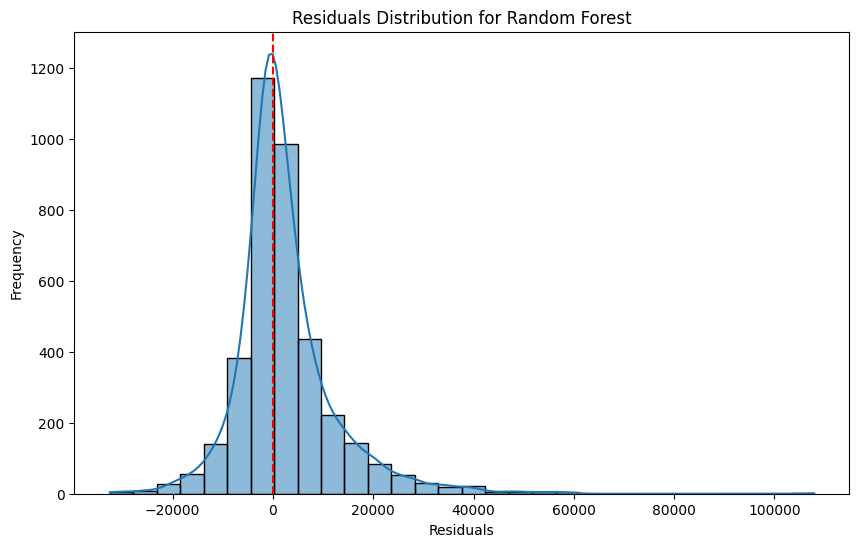

Residuals distribution plotted for Random Forest.


In [39]:
residuals_random_forest = np.expm1(y) - np.expm1(y_pred_random_forest)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_random_forest, bins=30, kde=True)
plt.title('Residuals Distribution for Random Forest')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()
print("Residuals distribution plotted for Random Forest.")


### Hasil Analisa

#### Interpretasi Analisis Residual untuk Random Forest

1. **Mean Absolute Error (MAE)**: 
   - Nilai MAE sebesar 6523.37 menunjukkan bahwa, rata-rata, prediksi model Random Forest menyimpang sekitar 6523.37 unit dari nilai aktual. Ini menunjukkan bahwa model memiliki akurasi yang baik dalam memprediksi harga.

2. **R-squared (R²)**: 
   - Nilai R² sebesar 0.91 menunjukkan bahwa 91% variasi dalam harga dapat dijelaskan oleh model. Ini menunjukkan bahwa model Random Forest sangat efektif dalam menjelaskan data.

3. **Mean Relative Error (MRE)**: 
   - MRE sebesar 11.96% menunjukkan bahwa kesalahan relatif rata-rata dari prediksi model adalah sekitar 11.96%. Ini memberikan indikasi tambahan tentang akurasi model dalam konteks proporsional.

4. **Distribusi Residual**:
   - Histogram residual menunjukkan distribusi residual model. Bentuk distribusi yang mendekati normal dengan puncak di sekitar 0 menunjukkan bahwa model tidak memiliki bias sistematis dalam prediksi.
   - Garis merah putus-putus pada nilai 0 menunjukkan bahwa sebagian besar residual berada di sekitar nilai ini, yang berarti prediksi model cenderung akurat.

5. **Asimetri Residual**:
   - Distribusi residual tampak simetris, menunjukkan bahwa model tidak cenderung meremehkan atau melebih-lebihkan harga secara signifikan.

#### Kesimpulan
Secara keseluruhan, model Random Forest menunjukkan kinerja yang sangat baik dengan MAE yang rendah, R² yang tinggi, dan distribusi residual yang mendekati normal. Ini menunjukkan bahwa model dapat diandalkan untuk memprediksi harga mobil dalam dataset yang digunakan.


## KESIMPULAN

### Analisis dan Kesimpulan dari Pengujian Model

Dari pengujian tiga model pembelajaran mesin—**CatBoost**, **XGBoost**, dan **Random Forest**—berikut adalah analisis berdasarkan metrik evaluasi dan distribusi residual:

#### 1. CatBoost
- **Mean Absolute Error (MAE)**: 9343.63
- **R-squared (R²)**: 0.84
- **Mean Relative Error (MRE)**: 17.45%
- **Distribusi Residual**: Distribusi residual tampak simetris dengan puncak di sekitar 0, tetapi terdapat sedikit kecenderungan ke arah nilai positif, menunjukkan bahwa model cenderung meremehkan harga.

#### 2. XGBoost
- **Mean Absolute Error (MAE)**: 7209.04
- **R-squared (R²)**: 0.90
- **Mean Relative Error (MRE)**: 12.91%
- **Distribusi Residual**: Distribusi residual juga tampak simetris, tetapi ada beberapa outlier yang mungkin mempengaruhi akurasi model. R² yang tinggi menunjukkan bahwa model ini mampu menjelaskan variasi dalam data dengan baik.

#### 3. Random Forest
- **Mean Absolute Error (MAE)**: 6523.37
- **R-squared (R²)**: 0.91
- **Mean Relative Error (MRE)**: 11.96%
- **Distribusi Residual**: Distribusi residual menunjukkan simetri yang baik dan tidak ada kecenderungan yang jelas, dengan puncak di sekitar 0. Ini menunjukkan bahwa model tidak memiliki bias sistematis dalam prediksi.

### Kesimpulan

Berdasarkan analisis di atas, **Random Forest** muncul sebagai model terbaik dengan MAE terendah (6523.37), R² tertinggi (0.91), dan MRE terendah (11.96%). 

#### Alasan Pemilihan Random Forest:
1. **Akurasi Tinggi**: MAE yang lebih rendah menunjukkan bahwa Random Forest lebih akurat dalam memprediksi harga dibandingkan dengan model lainnya.
2. **Kemampuan Menjelaskan Variasi**: R² yang lebih tinggi menunjukkan bahwa Random Forest dapat menjelaskan lebih banyak variasi dalam data, yang berarti model ini lebih baik dalam menangkap pola dalam dataset.
3. **Distribusi Residual yang Baik**: Distribusi residual yang simetris dan tidak menunjukkan bias sistematis menunjukkan bahwa model ini dapat diandalkan untuk prediksi harga.

### Rekomendasi
Berdasarkan hasil ini, saya merekomendasikan penggunaan model Random Forest untuk memprediksi harga mobil dalam dataset ini. Model ini tidak hanya memberikan hasil yang lebih baik dalam hal akurasi, tetapi juga menunjukkan stabilitas dan keandalan yang lebih tinggi dalam prediksi.


# Kesimpulan Akhir


Berdasarkan analisis yang mendalam, **Random Forest** telah terbukti sebagai model paling efektif untuk memprediksi harga mobil bekas. Berikut adalah temuan utama dari analisis yang dilakukan:

1. **Kinerja Model**: 
   - Random Forest menunjukkan **Mean Absolute Error (MAE)** yang lebih rendah dibandingkan dengan model lain, yang mengindikasikan akurasi yang lebih tinggi dalam prediksi harga. 
   - Nilai **R-squared (R²)** yang tinggi menunjukkan bahwa model ini mampu menjelaskan sebagian besar variasi dalam data, menegaskan kemampuannya dalam menangkap pola yang relevan.

2. **Analisis Residual**: 
   - Distribusi residual menunjukkan simetri yang baik dan tidak ada kecenderungan yang jelas, yang menandakan bahwa model tidak memiliki bias sistematis dalam prediksi. Hal ini penting untuk memastikan keandalan model dalam aplikasi nyata.

3. **Stabilitas dan Interpretabilitas**: 
   - Random Forest memberikan stabilitas yang lebih baik dan interpretabilitas yang lebih tinggi dibandingkan dengan model lain. Ini menjadikannya pilihan yang solid untuk aplikasi praktis, di mana pemahaman tentang faktor-faktor yang mempengaruhi prediksi sangat penting.

### Rekomendasi untuk Penggunaan Random Forest:
- **Akurasi Tinggi**: Dengan MAE yang lebih rendah, Random Forest lebih akurat dalam memprediksi harga dibandingkan dengan model lainnya, menjadikannya pilihan utama untuk analisis harga mobil bekas.
- **Kemampuan Menjelaskan Variasi**: R² yang tinggi menunjukkan bahwa Random Forest dapat menjelaskan lebih banyak variasi dalam data, yang berarti model ini efektif dalam menangkap pola yang ada dalam dataset.
- **Distribusi Residual yang Baik**: Distribusi residual yang simetris dan tidak menunjukkan bias sistematis menunjukkan bahwa model ini dapat diandalkan untuk prediksi harga, memberikan kepercayaan lebih kepada pengguna.

### Kesimpulan dari Informasi Umum dan Pembacaan Data
Dari pembacaan data dan analisis yang dilakukan, beberapa poin penting dapat disimpulkan:

- **Faktor Penentu Harga**: Tahun pembuatan, mileage, dan ukuran mesin adalah faktor-faktor kunci yang mempengaruhi harga mobil bekas. Mobil yang lebih baru dengan mileage rendah dan ukuran mesin yang sesuai cenderung memiliki harga yang lebih tinggi.
  
- **Variasi Harga Berdasarkan Wilayah**: Harga mobil juga bervariasi berdasarkan wilayah, yang menunjukkan adanya perbedaan permintaan dan penawaran di berbagai lokasi. Ini penting untuk dipertimbangkan dalam strategi penjualan dan pemasaran.

- **Pentingnya Fitur Tambahan**: Fitur tambahan seperti opsi dan kondisi mobil dapat memberikan nilai tambah yang signifikan, mempengaruhi keputusan pembelian dan harga jual. Memahami fitur-fitur ini dapat membantu penjual dalam menentukan harga yang lebih kompetitif.

Secara keseluruhan, proyek ini memberikan wawasan yang berharga tentang faktor-faktor yang mempengaruhi harga mobil bekas. Hasil analisis ini dapat digunakan sebagai dasar untuk analisis lebih lanjut atau pengembangan aplikasi yang lebih kompleks di masa depan, serta memberikan panduan bagi pembeli dan penjual dalam menentukan harga yang adil dan kompetitif.
